# Star Wars Survey

This project will clean and explore a data set compiled by [FiveThirtyEight](https://fivethirtyeight.com/) where they surveyed 835 Star Wars Fans with SurveyMonkey before the release of [*Star Wars: The Force Awakens*](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens)

The data set can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

We will explore this to determine fan's favorite films, characters, and other things involving the franchise. 


## Reading in and Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')


The data has many columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several columns where respondent's had to check one or more boxes. As a result, this data set needs a lot of cleaning.

Let's continue to explore and begin by removing invalid rows.

In [2]:
#Explore the data set 
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
#Explore columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#Remove rows where respondent ID is NaN
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars['RespondentID'].isnull().sum()
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and Mapping Yes/No Columns

Some columns have Yes or No answers, as well as NaN where a respondent chose not to answer. To make it easier to analyze down the line, we will change each column to True, False or NaN.

We will use pd.series.map() and dictionary mapping to change the values in those columns



In [5]:
#Explore unique values of the columns to determine the dictionary keys
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print('\n')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [6]:
#Create mapping dict
yes_no = {'Yes': True,'No': False}

#Change the column values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [7]:
#Check
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print('\n')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))
star_wars.head()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and Mapping Checkbox Columns

The next 6 columns represent a single checkbox question. The respondent checked off a series of boxes to the question, **Which of the following Star Wars films have you seen? Please select all that apply.**

The columns for this question are:

- Which of the following  Star Wars films have you seen? - If they saw Star Wars: Episode I The Phantom Menace
- Unnamed: 4 - If they saw Star Wars: Episode II Attack of the Clones
- Unnamed: 5 - If they saw Star Wars: Episode III Revenge of the Sith
- Unnamed: 6 - If they saw Star Wars: Episode IV A New Hope
- Unnamed: 7 - If they saw Star Wars: Episode V The Empire Strikes Back
- Unnamed: 8 - If they saw Star Wars: Episove VI Return of the Jedi

For each column, if the value is the name of the movie, it means they saw it. If NaN, they didn't answer or didn't see it. We will assume they didn't see it.

We will convert each column to a Boolean, then rename them. 

We will do the same as above, except use the movie title and NaN (np.NaN) in the mapping dictionary.

Each value will be True and False, then use df.rename() to seen_1, seen_2, etc. 


In [8]:
#Convert the columns
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [9]:
#Rename the columns to be more practical
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars films in order of least to most favorite, with 1 being favortie, 6 being least favorite. Thus, the values for the following columns are 1 - 6 or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much they liked Star Wars: Episode I The Phandom Menace
- Unnamed: 10 - How much they liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much they liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much they liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much they liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much they liked Star Wars: Episode VI Return of the Jedi

We will convert each column to numeric ype, then rename the columns to be more practical.

We will usse the df.astype() method to conver them to floats

In [10]:
#Convert the columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
#Check
star_wars[star_wars.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [11]:
#Rename the columns
star_wars = star_wars.rename(columns= {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": 'ranking_1',
    "Unnamed: 10": 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the Highest-Ranked Movie

Now that we have cleaned up the ranking columns, we can find the highest-ranked movie more quickly. We will take the mean of each of the ranking columns using pd.mean().

In [12]:
#Compute the mean of each of the ranking columns 
mean = star_wars.mean(axis=0)
ranking_cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
ranking_mean = mean[ranking_cols]
ranking_mean


ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

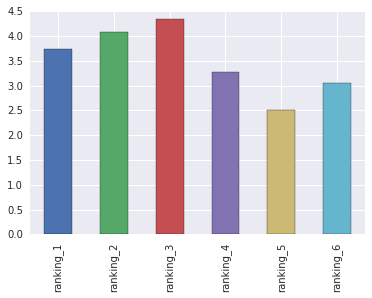

In [13]:
ranking_mean.plot.bar()

Looking at the ranking of the movies, it looks like the original Star Wars films are the highest ranked ones compared to the more recently produced prequels done by Fox. To be more specific, the Top 3 are Star Wars V Empire Strikes Back (2nd Film), Star Wars IV A New Hope (1st Film) and Star Wars VI Return of the Jedi (3rd Film). This is not surprising when considering the fandom for Star Wars is huge and full of very loyal fans that praise the art, direction and technological feats of the original films, when compared with the times. It's important to remember they were made between 1977 and 1983. 

Knowing the reception of the later made prequels, it's not surprising for them to be ranked last in comparison, as they were highly criticized for deviating from the humor and strong story that made the originals so highly regarded. Though due to the high anticipation for the prequels, compared with a fandom that deeply valued the nostalgia, some would say they were doomed from the start.

## Finding the Most Viewed Movie

Earlier in this project, I cleaned up the seen columns and converted their values to a Boolean df.sum() treats them like integers. Thus, we can find out how many people saw each movie by taking the sum of the column.

In [14]:
#Find the sum of each seen columns
cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
seen_sum = star_wars[cols].sum()
seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

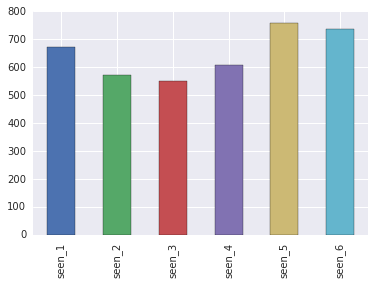

In [15]:
#Plot the results
seen_sum.plot.bar()

Looking at the results, the most watched Star Wars films are Episode V (2nd Film), Episode, VI (3rd Film), and Episode I (4th Film). This also is not totally surprising. After the success of the first film, the anticipation and fandom of the latter three films in the series must have cause higher then average turn out. Plus, the most watched Star Wars Film also matches the Highest Ranked Star Wars Film - A New Hope. With the first prequel being the 3rd most watched, this also inn't surprising given the amount of anticipation and marketing that went into reviving the series. 

## Exploring the Data by Binary Segments

We now know the movies the survey population as a whole ranked the highest as well as the most watched, which are the original Star Wars films from the late to early 80s.

Now let's examine how certain segments of the survey population responded. There are several columns that segment the data into two groups:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

We can split the dataframe into two groups on a binary column by creating two subsets of that column to compute the most viewed movie, highest ranked and other stats for each group.


In [16]:
#Split the data into two groups for the gender column 
males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']

In [17]:
#Find highest ranked movie of each group
males_rank = males[ranking_cols].mean().reset_index()
females_rank = females[ranking_cols].mean().reset_index()
males_rank = males_rank.rename(columns={'index':'rankings', 0:'Mean'})
females_rank = females_rank.rename(columns={'index':'rankings', 0:'Mean'})
print('Males Ranking','\n',males_rank)
print('\n')
print('Females Ranking','\n', females_rank)


Males Ranking 
     rankings      Mean
0  ranking_1  4.037825
1  ranking_2  4.224586
2  ranking_3  4.274882
3  ranking_4  2.997636
4  ranking_5  2.458629
5  ranking_6  3.002364


Females Ranking 
     rankings      Mean
0  ranking_1  3.429293
1  ranking_2  3.954660
2  ranking_3  4.418136
3  ranking_4  3.544081
4  ranking_5  2.569270
5  ranking_6  3.078086


In [18]:
#Find the sum of each seen columns by gender
cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
males_seen = males[cols].sum().sort_values(ascending=False).reset_index()
females_seen = females[cols].sum().sort_values(ascending=False).reset_index()
print('Male Viewing')
print(males_seen)
print('\n')
print('Female Viewing')
print(females_seen)

Male Viewing
    index    0
0  seen_5  392
1  seen_6  387
2  seen_1  361
3  seen_4  342
4  seen_2  323
5  seen_3  317


Female Viewing
    index    0
0  seen_5  353
1  seen_6  338
2  seen_1  298
3  seen_4  255
4  seen_2  237
5  seen_3  222


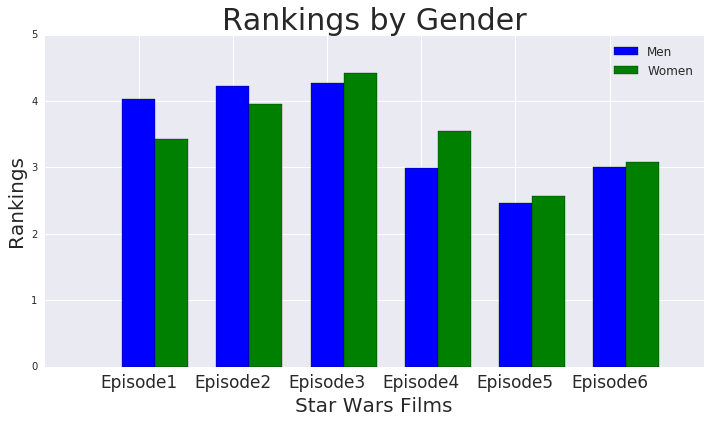

In [19]:
labels = ['Episode1', 'Episode2', 'Episode3', 'Episode4', 'Episode5', 'Episode6']
men_means = males_rank['Mean']
women_means = females_rank['Mean']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, men_means, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women_means, width, label='Women', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rankings', fontsize=20)
ax.set_xlabel('Star Wars Films', fontsize=20)
ax.set_title('Rankings by Gender', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=12)
ax.set_ylim(0,5)

fig.tight_layout()

plt.show()

Looking at the comparison between rankings of the films by gender, it follows a similar pattern as before, where the original Star Wars are the highest ranked films with Episode 5 being considered the best one. 

Though one to note is that males rank the first film about a half tick better than females whereas females rank the first prequel the same amount. 

Males also rank Episode 4 and 6 roughly the same whereas females, like Episode 6 more than 4, the original.


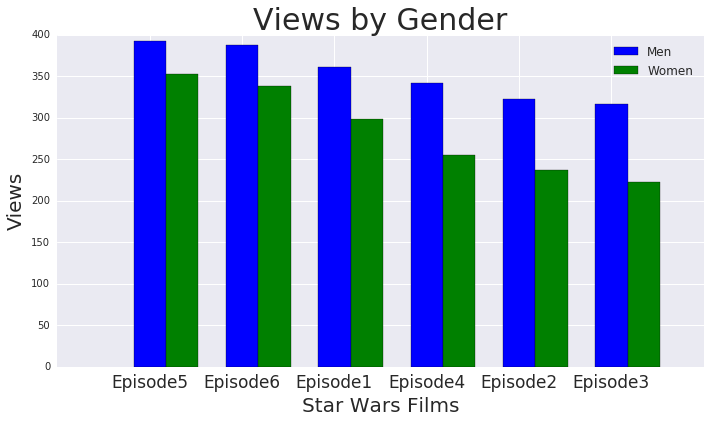

In [20]:
labels = ['Episode5', 'Episode6', 'Episode1', 'Episode4', 'Episode2', 'Episode3']
men_views = males_seen[0]
female_views = females_seen[0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, men_views, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, female_views, width, label='Women', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Views', fontsize=20)
ax.set_xlabel('Star Wars Films', fontsize=20)
ax.set_title('Views by Gender', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=12)


fig.tight_layout()

plt.show()

The trend here reflects that seen in the overall views as well as the rankings. The Episodes 5 & 6 of the original triology and the first episode of the Prequels are the most watched. Assumed to be due to anticipation and fandom. 

Something to consider is we see a widening gap between males and females as the series went on which could mean that the franchise held the interest of males longer than that of females, who lose interest at a much faster rate. 

## Exploring the Star Wars Characters

Finally, let's explore the how the respondents liked the Star Wars characters. First let's clean up the columns then we can:

- Determine the most and least familiar characters
- Determine which character respondents like the most
- Determine which character respondents like the least
- Determine the most controversial (split between likes and dislikes)?



In [21]:
#Clean up the columns
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [22]:
#Let's rename them
chars = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16':'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2-D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala', 
    'Unnamed: 28': 'Yoda'
    }

star_wars = star_wars.rename(columns=chars)
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2-D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

### Most & Least Familiar Characters 

In [23]:
# Selecting all the radio-button columns
unfamiliar = star_wars.iloc[:, 15:29]

# Creating a dictionary and mapping only unfamiliar characters
unfamiliar_dict = {'Unfamiliar (N/A)': 1}

for column in unfamiliar.columns:
    unfamiliar[column] = unfamiliar[column].map(unfamiliar_dict)
    
# Counting for each character the number of people for whom it's unfamiliar
unfamiliar_sum = unfamiliar.sum().sort_values(ascending=False).reset_index()

# Renaming the 0 column
unfamiliar_sum.rename(columns={0: 'viewers'}, inplace=True) 

# Resetting the index
unfamiliar_sum = unfamiliar_sum.set_index('index', drop=True) 
unfamiliar_sum


,viewers
index,
Padme Amidala,164.0
Emperor Palpatine,156.0
Lando Calrissian,148.0
Boba Fett,132.0
Jar Jar Binks,109.0
Anakin Skywalker,52.0
Obi Wan Kenobi,17.0
C-3P0,15.0
Han Solo,15.0


In [24]:
unfamiliar_sum['percentage'] = unfamiliar_sum['viewers']/835
unfamiliar_sum

,viewers,percentage
index,,
Padme Amidala,164.0,0.196407
Emperor Palpatine,156.0,0.186826
Lando Calrissian,148.0,0.177246
Boba Fett,132.0,0.158084
Jar Jar Binks,109.0,0.130539
Anakin Skywalker,52.0,0.062275
Obi Wan Kenobi,17.0,0.020359
C-3P0,15.0,0.017964
Han Solo,15.0,0.017964


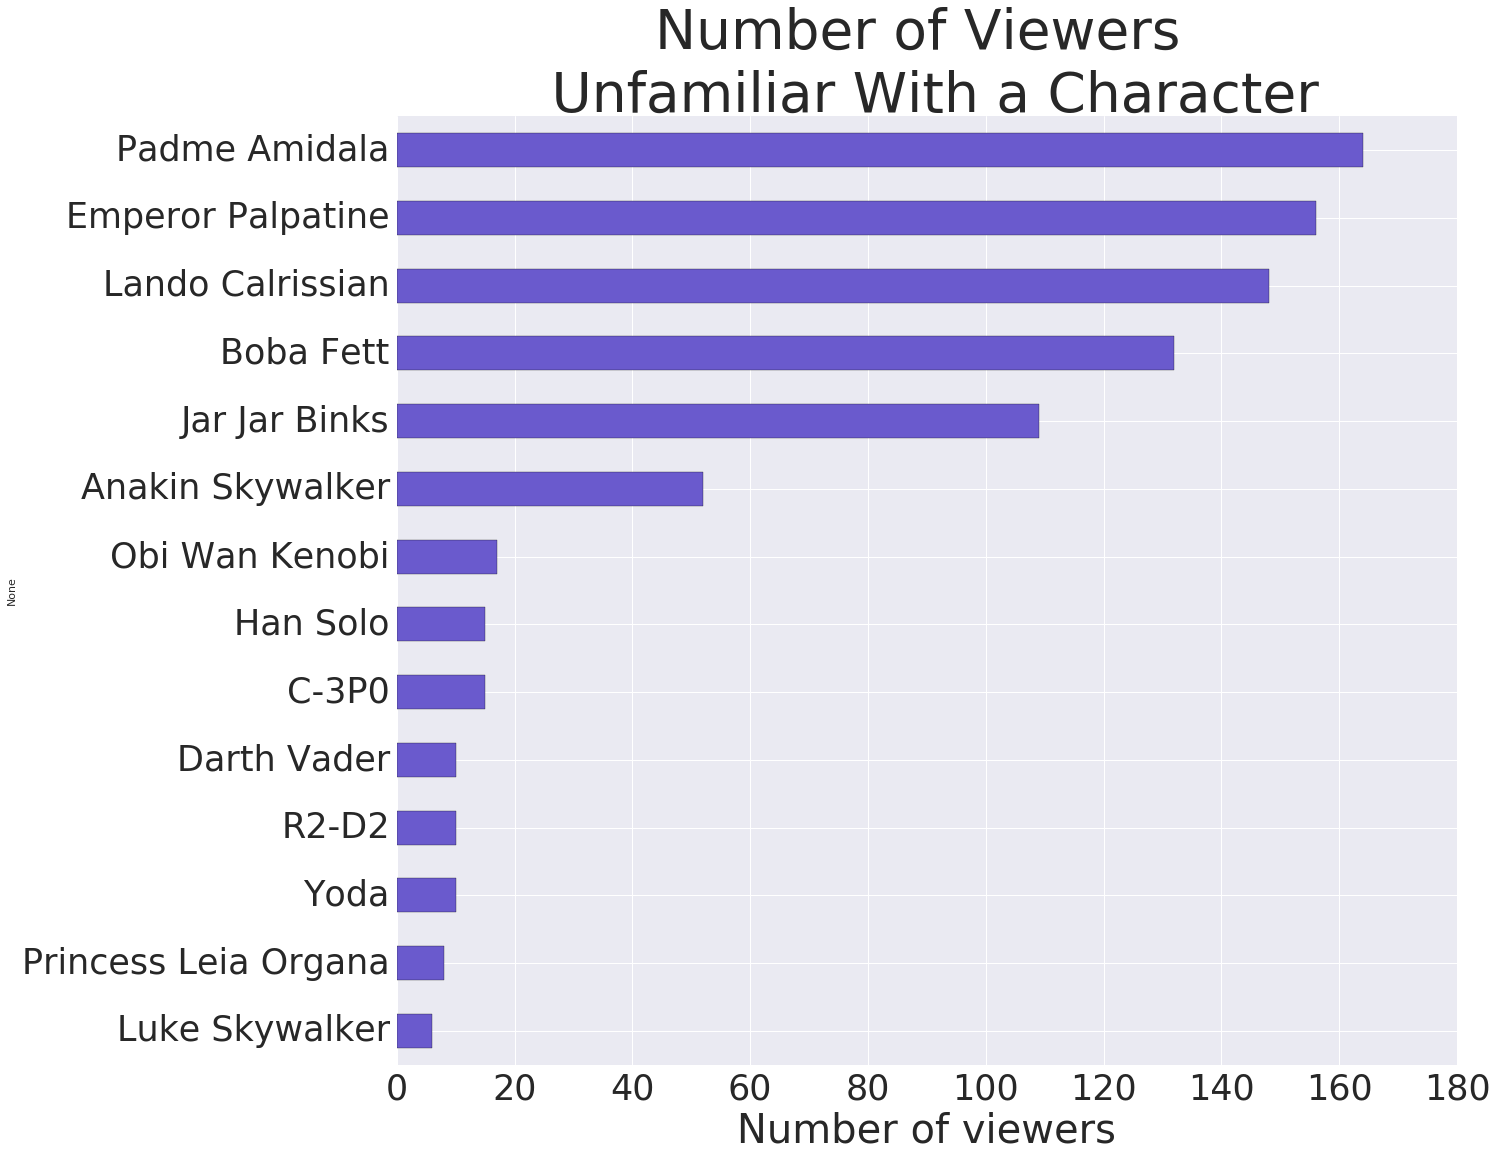

In [25]:
#Define a function to plot a horozontal bar graph
def plot_horozontal_bar(df, column, title, xlabel, xlim_end):
    fig, ax = plt.subplots(figsize=(19,17))
    df[column].sort_values().plot.barh(color='slateblue',
                                      xlim=(0, xlim_end),
                                      rot=0)
    ax.set_title(title, fontsize=55)
    ax.set_ylabel(None)
    ax.set_xlabel(xlabel, fontsize=40)
    ax.tick_params(axis='both', labelsize=35, left=False)
    plt.show()

plot_horozontal_bar(df=unfamiliar_sum,
                    column='viewers', 
                    title='Number of Viewers \n Unfamiliar With a Character',
                   xlabel = 'Number of viewers',
                   xlim_end=None)




Looks like the least familiar characters in the Star Wars films are **Padme Amidala, Emperor Palpatine and Lando Calrissian**, each unknown by about 20%, 19% and 18% of respondents, respectively.

The most familiar characters (all from the original trilogy) are **Luke Skywalker and Princess Leia, along with R2-D2, Yoda, and Darth Vader**.  

### Most and Least Favorable Characters 

Finally, we will investigate the most and least favorable of the Star Wars characters. 

In [26]:
favorite = star_wars.iloc[:, 15:29]
favorite.head()
favorite['Darth Vader'].unique()

array(['Very favorably', nan, 'Unfamiliar (N/A)', 'Somewhat favorably',
       'Somewhat unfavorably', 'Very unfavorably',
       'Neither favorably nor unfavorably (neutral)'], dtype=object)

In [27]:
favorite_dict = {'Very favorably': 1, 'Somewhat favorably':2,
       'Somewhat unfavorably':4, 'Very unfavorably':5,
       'Neither favorably nor unfavorably (neutral)':3, 'Unfamiliar (N/A)':np.nan}

#Create a list of columns
columns = []

for column in favorite.columns:
    favorite[column] = favorite[column].map(favorite_dict)
    columns.append(column)
    
#Calculate mean
favorite_mean = favorite.mean().reset_index()

favorite_mean.rename(columns={0:'rankings'}, inplace=True)
favorite_mean = favorite_mean.set_index('index', drop=True)
print(favorite_mean) 

                      rankings
index                         
Han Solo              1.328010
Luke Skywalker        1.419394
Princess Leia Organa  1.444714
Anakin Skywalker      2.224384
Obi Wan Kenobi        1.367574
Emperor Palpatine     2.928571
Darth Vader           2.520833
Lando Calrissian      2.363095
Boba Fett             2.642647
C-3P0                 1.596059
R2-D2                 1.430488
Jar Jar Binks         3.219101
Padme Amidala         2.395385
Yoda                  1.370098


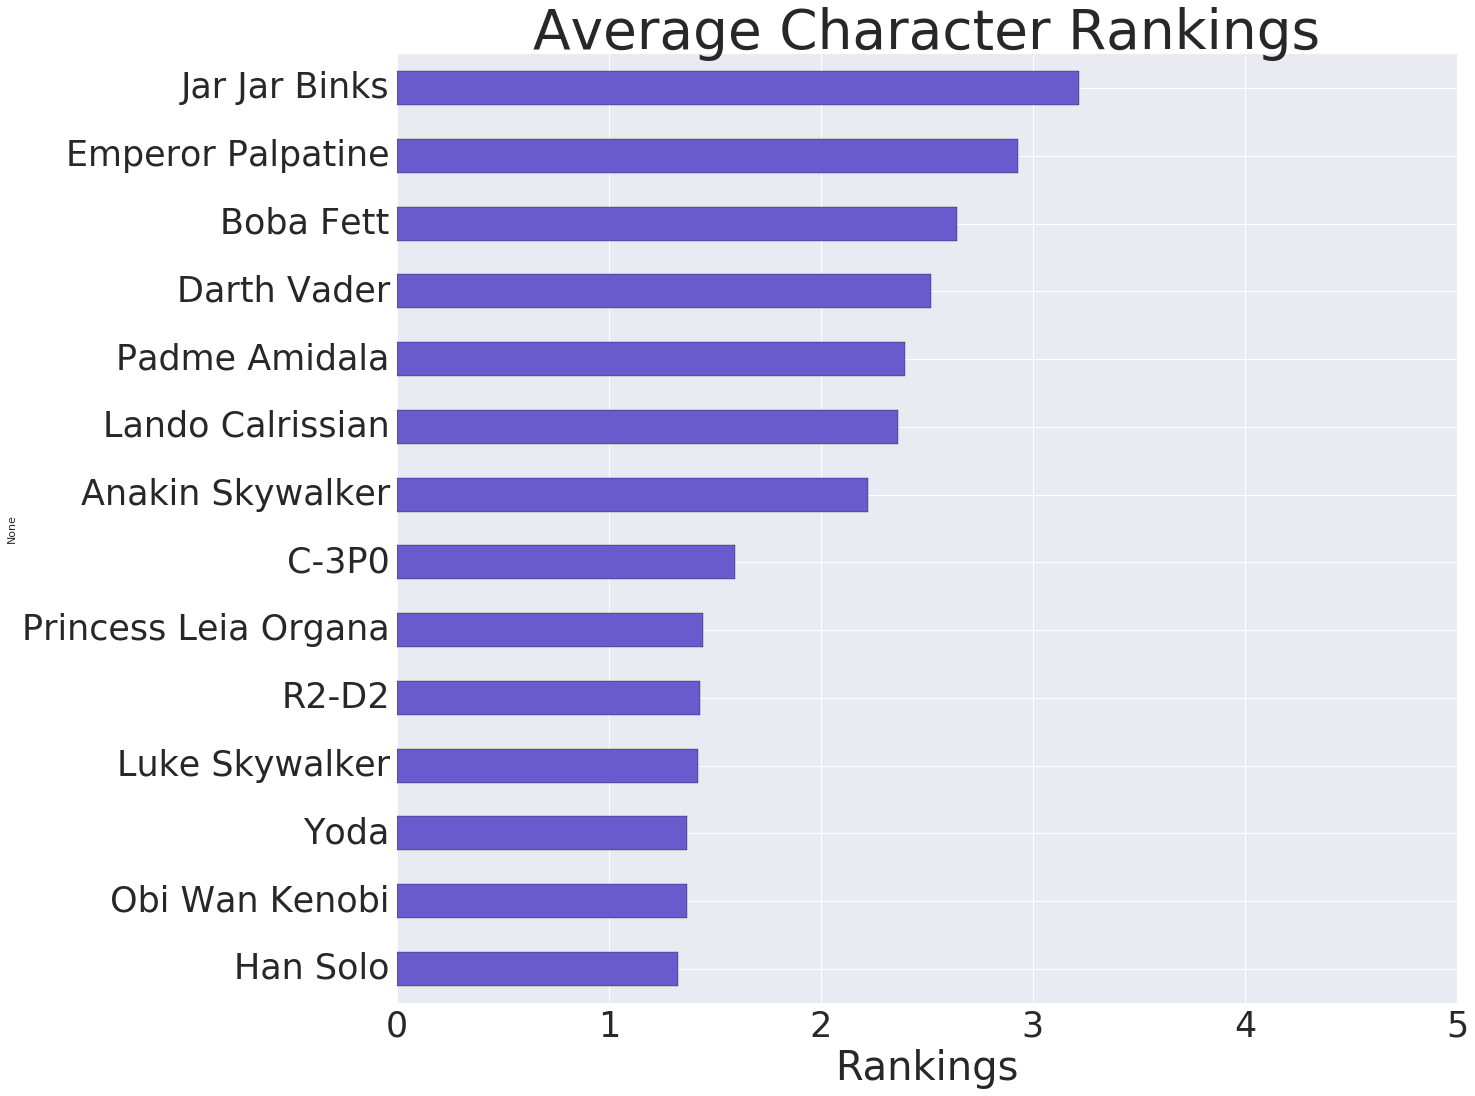

In [29]:
#Plot it out
plot_horozontal_bar(df=favorite_mean,
                   column='rankings',
                   title='Average Character Rankings',
                   xlabel='Rankings',
                   xlim_end=5)

It looks like the least favorite characters are Boba Fett, Emperor Palpatine and Jar Jar Binks.

The most favored characters are Han Solo, Obi Wan Kenobi, Yoda and Luke Skywalker, all differing pretty insignificatly. 

Let's dive deeper into the distribution and see who may be the most controversial.

In [32]:
#Reshape the date frame
melt = pd.melt(favorite, value_vars=columns)
melt.head()

,variable,value
0,Han Solo,1.0
1,Han Solo,NaN
2,Han Solo,2.0
3,Han Solo,1.0
4,Han Solo,1.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



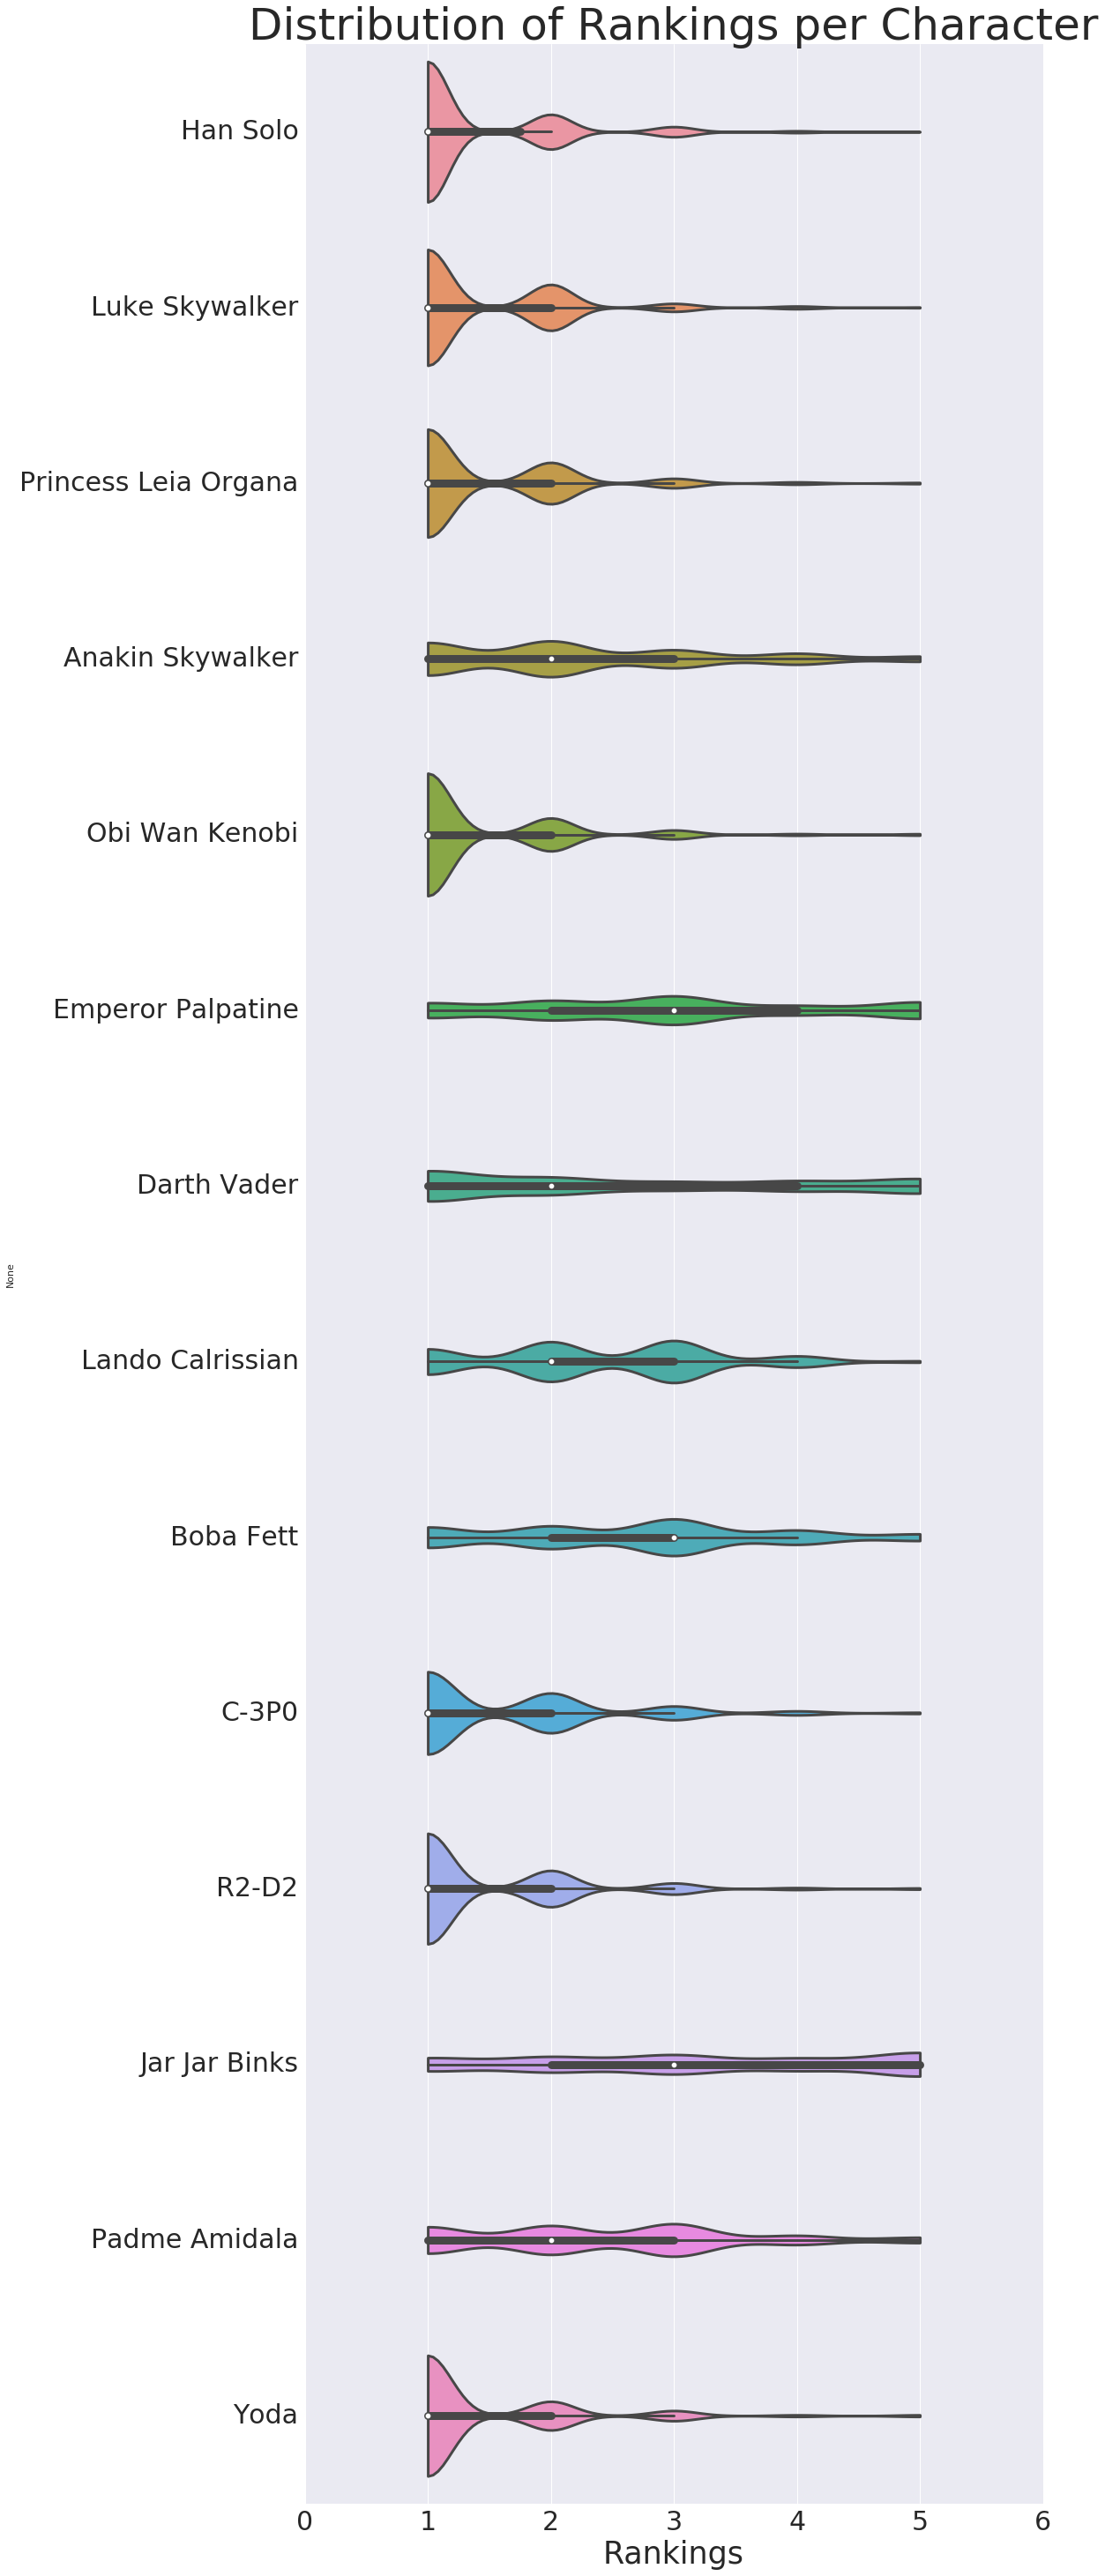

In [35]:
# Creating horizontal violin plots in a truncated form
# (to extend it only to the min and max values of the dataset)
categories = melt['variable']
values = melt['value']
fig, ax = plt.subplots(figsize=(15, 50))
sns.violinplot(y=categories, x=values, linewidth=3, cut=0)
ax.set_title('Distribution of Rankings per Character', fontsize=50)
ax.set_ylabel(None)  
ax.set_xlabel('Rankings', fontsize=35)
ax.tick_params(axis='both', labelsize=30, left = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

Looking at the distributions, Yoda, Han Solo, Luke, Princess Leia, Obi Wan, followed by the droids are the most favorite where a majority of their rankings fall in the top rankings.

We see a bit more of an even distribution for Jar Jar Binks across the favorability spectrum as well as Darth Vader and Emperor Palpatine. Though Emperor Palpatine and Darth Vader sees a larger distribution in the center, with the median equal to the neutral ranking, showing a bit of an even tie between likes and dislikes, making them the most controversial.

## Conclusion

After cleaning and analyzing the survey data, we can come up with somekey findings.

1. Star Wars Episode V: The Empire Strikes Back is a clear favorite of the Star Wars films.
    - Even amongst gender subgroups analysed in this study, we found that Episode V was consistantly ranked the best.
    - We also concluded that Episode III: Revenge of the Sith was consistantly ranked the worst of the 6 films.
    
2. Some of the other interesting findings from this study are:
    - More males than females watched the films
    - Males and females ranked the movies differently except for the best and worst in their rankings
    - Females were more fond of some of the newer films (episode I and episode II) and didn't like the original Episode IV as much as males
    - Males tend to be loyalists to the original three movies and ranked the newer three (episodes I, II, III respectively) last

3. As far as the characters, there isn't much surprise in who's most and least favorable, except that JarJar Binks is even less favorable than the most evil villain in the franchise: Emperor Palpatine.
    - The most favorable are Han Solo, followed closely by Yoda who are both known fan favorites.
    - The least favorable is JarJar Binks, followed by Emporer Palpatine.
    - The most controversial character is Darth Vader and Emperor Palpatine with the most split vote of favorability